In [54]:
#import the neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm import tqdm



In [5]:
# Loading the data
df = pd.read_csv('/content/sample_data/TCS_stock_history (1).csv')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0
...,...,...,...,...,...,...,...,...
4458,2021-09-24,3890.000000,3944.399902,3855.000000,3871.300049,2320754,0.0,0.0
4459,2021-09-27,3900.000000,3904.000000,3802.899902,3836.949951,1673362,0.0,0.0
4460,2021-09-28,3850.000000,3850.000000,3751.250000,3779.149902,2253075,0.0,0.0
4461,2021-09-29,3759.800049,3806.000000,3722.149902,3791.899902,2489161,0.0,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4463 non-null   object 
 1   Open          4463 non-null   float64
 2   High          4463 non-null   float64
 3   Low           4463 non-null   float64
 4   Close         4463 non-null   float64
 5   Volume        4463 non-null   int64  
 6   Dividends     4463 non-null   float64
 7   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 279.1+ KB


In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

In [18]:
df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200
count,4463,4463.000000,4463.000000,4463.000000,4463.000000,4.463000e+03,4463.000000,4463.000000,4414.000000,4264.000000
mean,2012-08-23 19:22:31.109119488,866.936239,876.675013,856.653850,866.537398,3.537876e+06,0.071533,0.001344,855.296524,827.939710
min,2002-08-12 00:00:00,24.146938,27.102587,24.146938,26.377609,0.000000e+00,0.000000,0.000000,28.226462,38.361673
25%,2008-02-14 12:00:00,188.951782,191.571816,185.979417,188.594620,1.860959e+06,0.000000,0.000000,186.661243,192.689310
50%,2012-09-04 00:00:00,530.907530,534.751639,525.616849,529.713257,2.757742e+06,0.000000,0.000000,537.554927,530.090287
75%,2017-03-22 12:00:00,1156.462421,1165.815854,1143.622800,1154.784851,4.278625e+06,0.000000,0.000000,1142.421716,1125.963538
max,2021-09-30 00:00:00,3930.000000,3981.750000,3892.100098,3954.550049,8.806715e+07,40.000000,2.000000,3584.287983,3227.919528
std,NaN,829.905368,838.267104,821.233477,829.611313,3.273531e+06,0.965401,0.051842,802.197464,738.556791


In [19]:
corel=df.corr()
corel

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,MA200
Date,1.000000,0.899114,0.899354,0.898962,0.899214,-0.177351,0.062321,-0.005701,0.907325,0.924093
Open,0.899114,1.000000,0.999888,0.999892,0.999787,-0.153362,0.059743,-0.006715,0.997051,0.989297
High,0.899354,0.999888,1.000000,0.999867,0.999914,-0.150918,0.060044,-0.006597,0.997119,0.989460
Low,0.898962,0.999892,0.999867,1.000000,0.999901,-0.154962,0.059916,-0.006622,0.996901,0.989098
Close,0.899214,0.999787,0.999914,0.999901,1.000000,-0.152844,0.060179,-0.006635,0.996965,0.989252
Volume,-0.177351,-0.153362,-0.150918,-0.154962,-0.152844,1.000000,-0.010332,0.004752,-0.166477,-0.208166
Dividends,0.062321,0.059743,0.060044,0.059916,0.060179,-0.010332,1.000000,0.142493,0.060698,0.061458
Stock Splits,-0.005701,-0.006715,-0.006597,-0.006622,-0.006635,0.004752,0.142493,1.000000,-0.008144,-0.010607
MA50,0.907325,0.997051,0.997119,0.996901,0.996965,-0.166477,0.060698,-0.008144,1.000000,0.994216
MA200,0.924093,0.989297,0.989460,0.989098,0.989252,-0.208166,0.061458,-0.010607,0.994216,1.000000


In [22]:
# Correlation of features with the target variable (Close Price)
correlation_with_close =df.corr()['Close'].sort_values(ascending=False)
print(correlation_with_close)

Close           1.000000
High            0.999914
Low             0.999901
Open            0.999787
MA50            0.996965
MA200           0.989252
Date            0.899214
Dividends       0.060179
Stock Splits   -0.006635
Volume         -0.152844
Name: Close, dtype: float64


In [6]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [7]:
df.duplicated().sum()

0

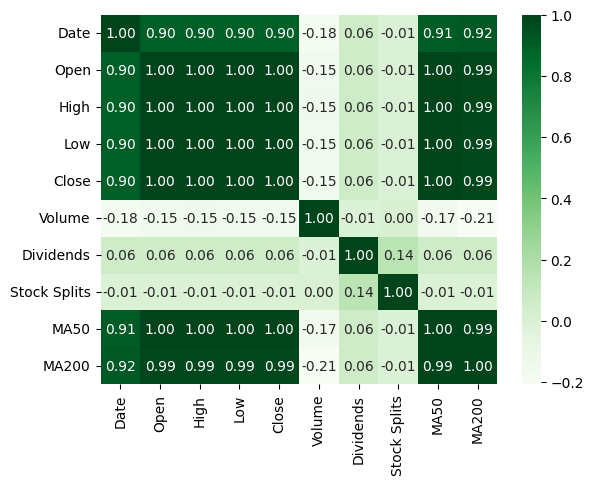

In [25]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

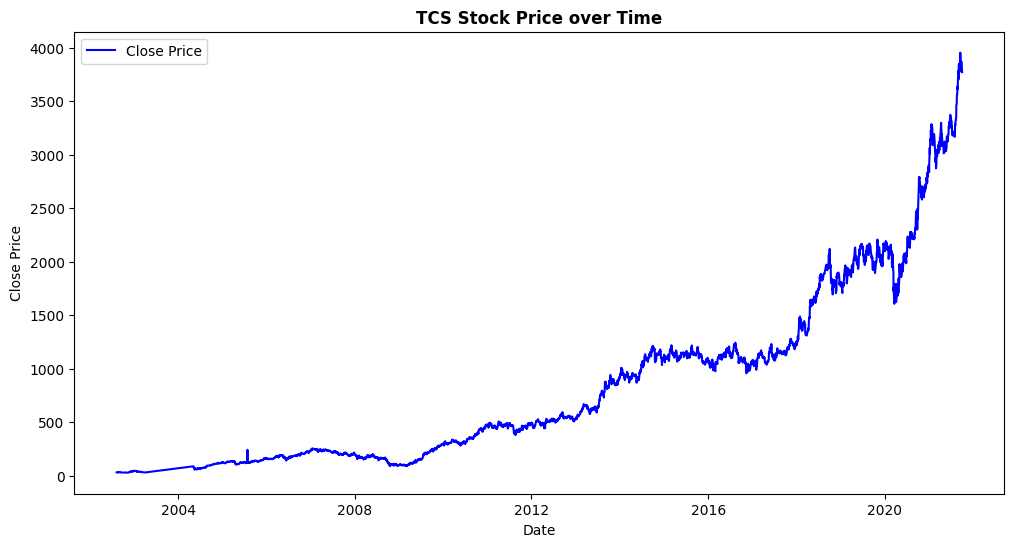

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

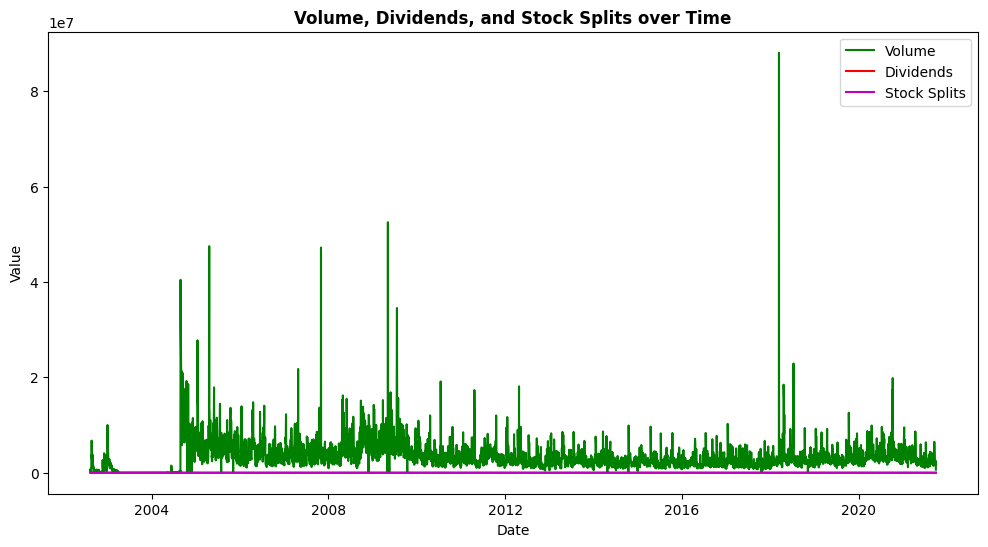

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='g')
plt.plot(df['Date'], df['Dividends'], label='Dividends',
color='r')
plt.plot(df['Date'], df['Stock Splits'], label='Stock Splits',
color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Dividends, and Stock Splits over Time',weight = "bold")
plt.legend()
plt.show()

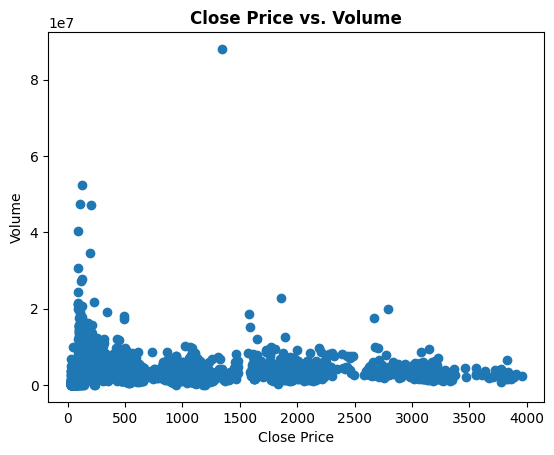

In [30]:
plt.scatter(df['Close'], df['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

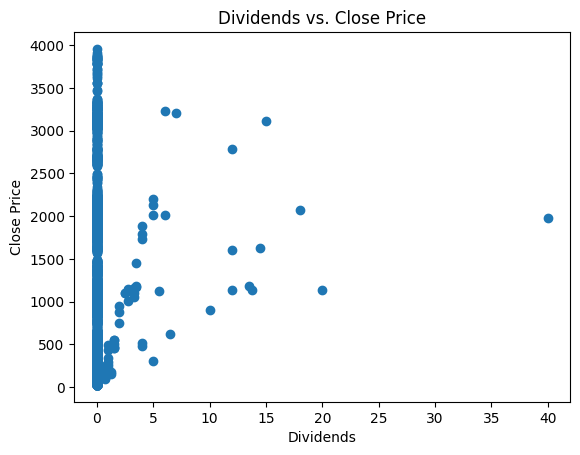

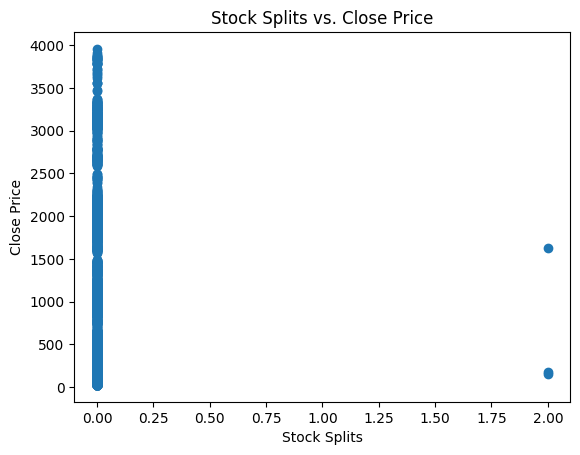

In [33]:
# Dividends vs. Close Price
plt.scatter(df['Dividends'], df['Close'])
plt.xlabel('Dividends')
plt.ylabel('Close Price')
plt.title('Dividends vs. Close Price')
plt.show()
# Stock Splits vs. Close Price
plt.scatter(df['Stock Splits'], df['Close'])
plt.xlabel('Stock Splits')
plt.ylabel('Close Price')
plt.title('Stock Splits vs. Close Price')
plt.show()

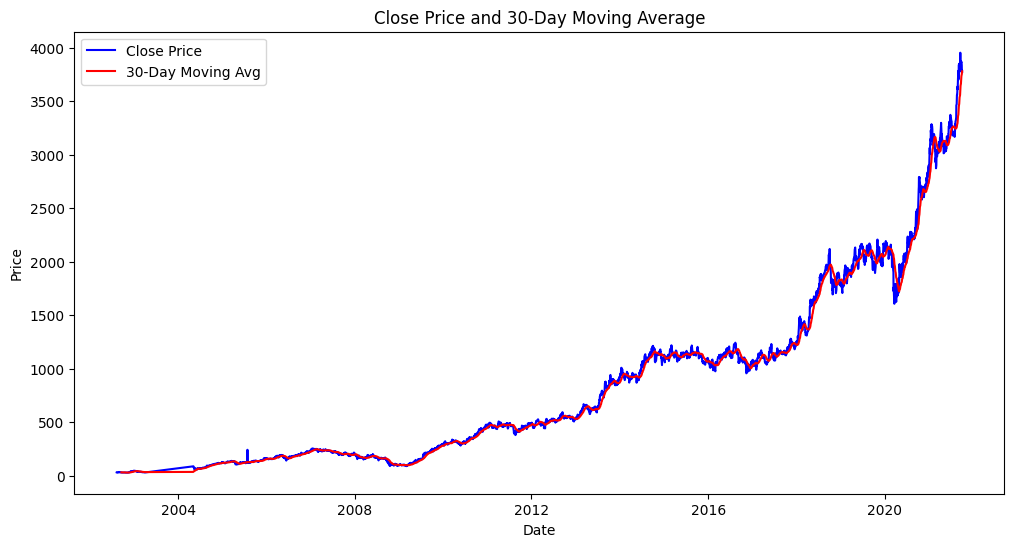

In [34]:
df['30-Day Moving Avg'] = df['Close'].rolling(window=30).mean()
# Plot Close price and moving average
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.plot(df['Date'], df['30-Day Moving Avg'], label='30-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

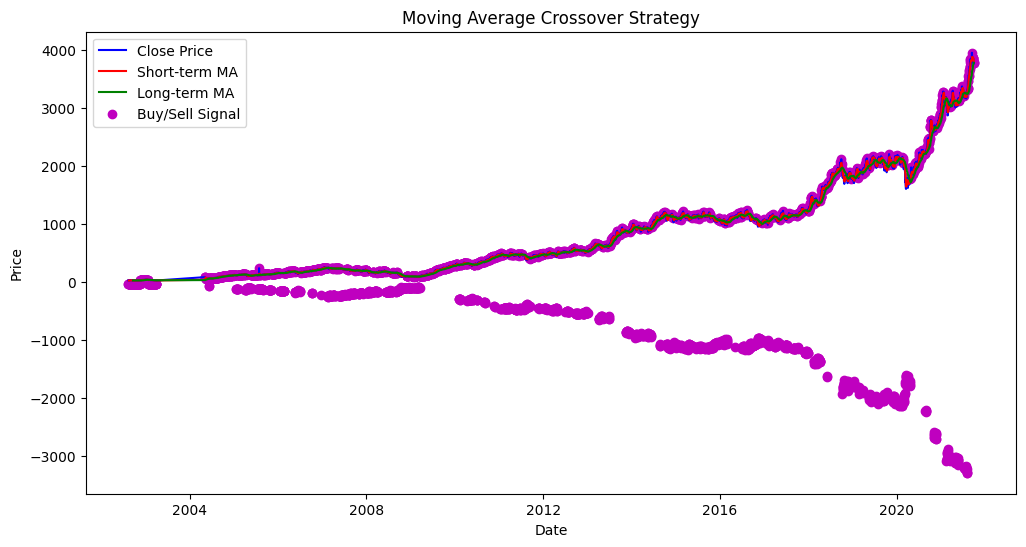

In [35]:
df['Short_MA'] = df['Close'].rolling(window=5).mean()
df['Long_MA'] = df['Close'].rolling(window=30).mean()
# Creating a trading signals based on moving average crossovers
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)
# Plot the strategy signals
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price',
color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA',
color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA',
color='g')
plt.scatter(df['Date'], df['Close'] * df['Signal'],
label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

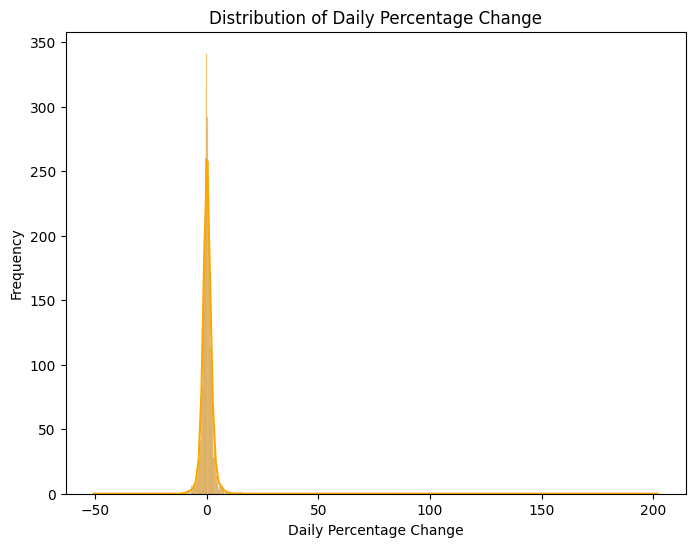

In [36]:
df['Daily_Price_Change'] = df['Close'].pct_change() * 100
# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,
color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [37]:
df['Moving_Avg_Close'] = df['Close'].rolling(window=7).mean()

In [38]:
df.shape

(4463, 16)

In [40]:
# Prepare the data for LSTM
X_train = df['Close'].values.reshape(-1, 1)
y_train = df['Close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [41]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [61]:
#Building a LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the number of epochs and batch size
epochs = 30
batch_size = 15

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
  for i in range(0, len(X_train_lstm), batch_size):
    X_batch = X_train_lstm[i:i+batch_size]
    y_batch = y_train_lstm[i:i+batch_size]
model.train_on_batch(X_batch, y_batch)
# Prepare the data for prediction
X_test = test_data['Close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 30/30 [00:00<00:00, 3852.23it/s]


In [62]:
lstm_predictions = model.predict(X_test_lstm).flatten()

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [63]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

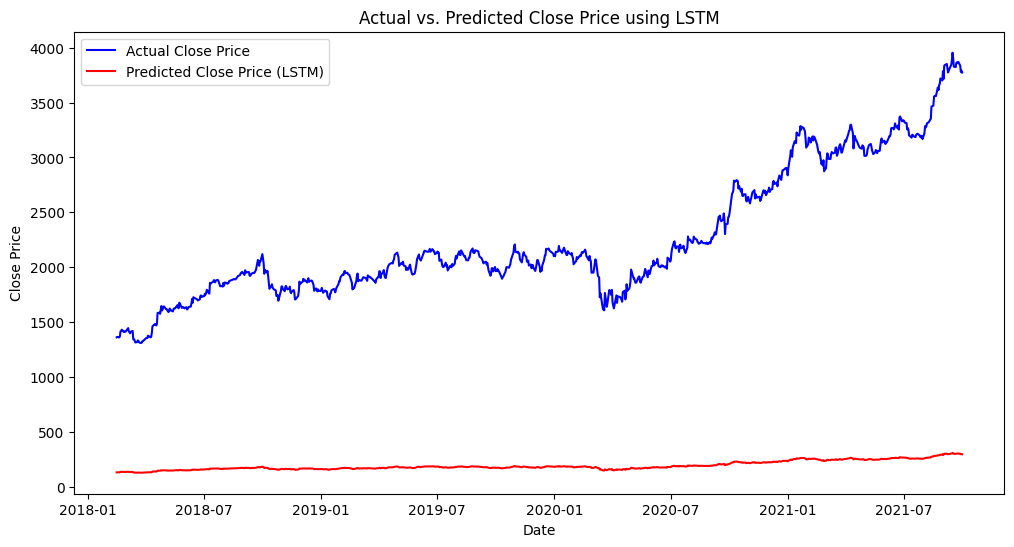

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['Close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()

In [65]:
lstm_mae = mean_absolute_error(test_data['Close'],
lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 2066.2826437415565


In [66]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
date_index = test_data.index[-len(lstm_predictions):]
predictions_df = pd.DataFrame({'Date': date_index,
'Predicted_Close': lstm_predictions.flatten()})

predictions_df.to_csv('predictions.csv', index=False)